In [3]:
import os
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
path = '/kaggle/input/jane-street-real-time-market-data-forecasting/'
target = 'responder_6'
# features = ["date_id", "time_id", "symbol_id"] + [f"feature_{i:02d}" for i in range(79)]

In [5]:
start_dt = 1698 - 100

data = (pl.scan_parquet(os.path.join(path, "train.parquet"))
        .filter(pl.col("date_id")>= (start_dt))
       # .select("responder_6")
       .collect())

In [6]:
train = data.to_pandas()

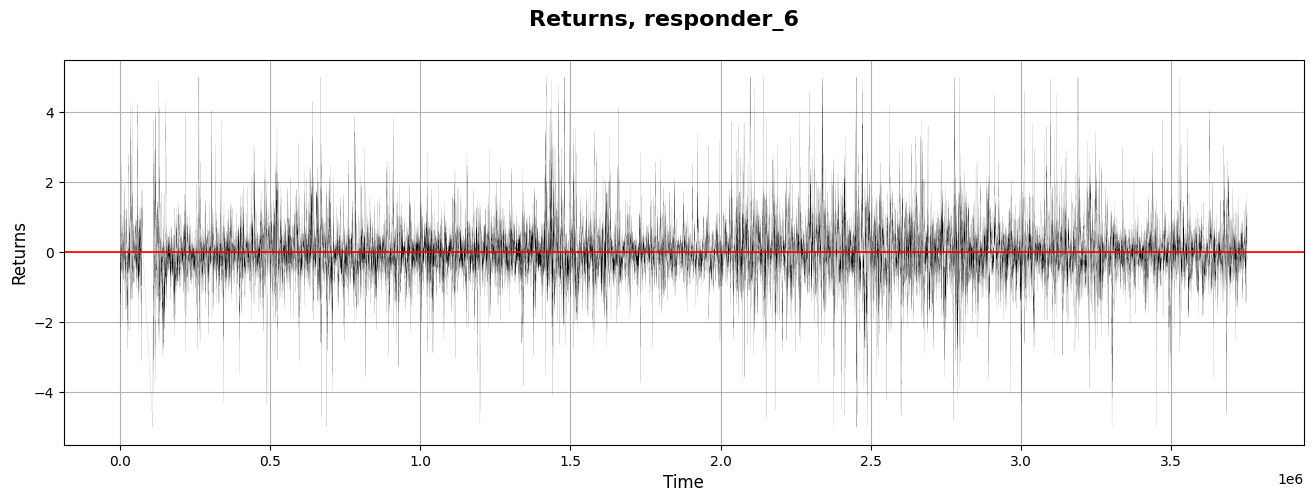

In [4]:
train['N']=train.index.values 
train['id']=train.index.values 

xx= train[(train.symbol_id==1)] ['id']
yy=train[ (train.symbol_id==1)]['responder_6']

plt.figure(figsize=(16, 5))
plt.plot(xx,yy, color = 'black', linewidth =0.05)
plt.suptitle('Returns, responder_6', weight='bold', fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Returns", fontsize=12)
plt.grid(linewidth=0.8)
plt.axhline(0, color='red', linestyle='-', linewidth=1.2)
plt.show()

Куммулятивная доходность

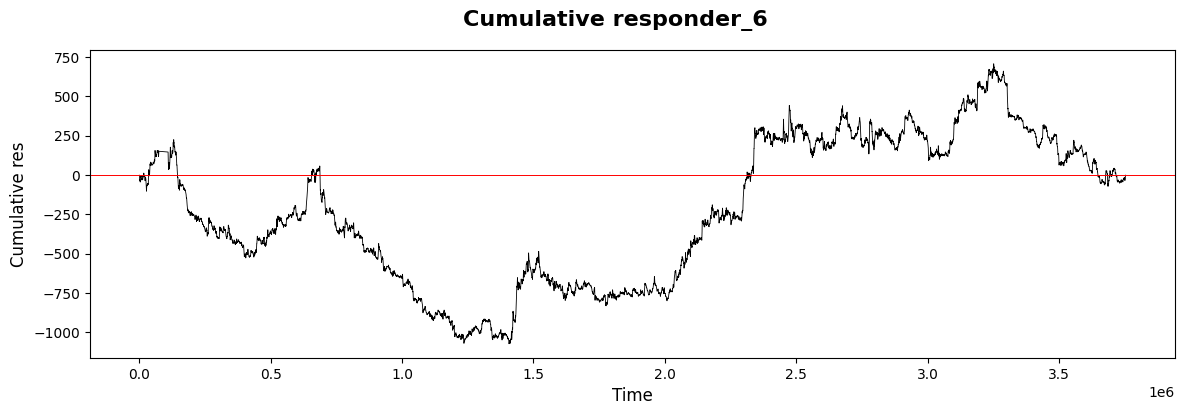

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(xx,yy.cumsum(), color = 'black', linewidth =0.6)
plt.suptitle('Cumulative responder_6', weight='bold', fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative res", fontsize=12)
# plt.yticks(np.arange(-500,1000,250))
plt.axhline(0, color='red', linestyle='-', linewidth=0.7)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


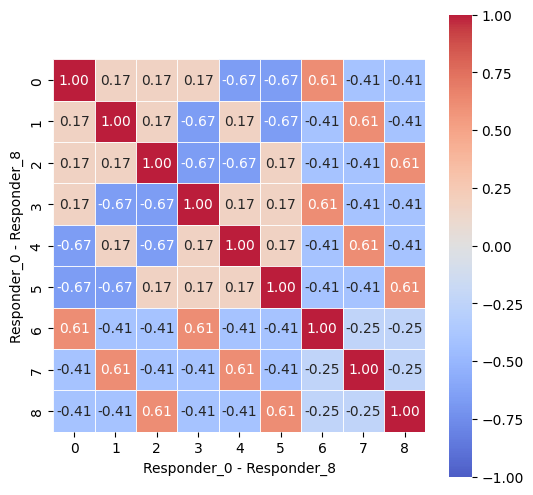

In [14]:
plt.figure(figsize=(6, 6))
responders = pd.read_csv(f"{path}/responders.csv")
matrix = responders[[ f"tag_{no}" for no in range(0,5,1) ] ].T.corr()
sns.heatmap(matrix, square=True, cmap="coolwarm", alpha =0.9, vmin=-1, vmax=1, center= 0, linewidths=0.5, 
            linecolor='white', annot=True, fmt='.2f')
plt.xlabel("Responder_0 - Responder_8")
plt.ylabel("Responder_0 - Responder_8")
plt.show()

Распределение responders

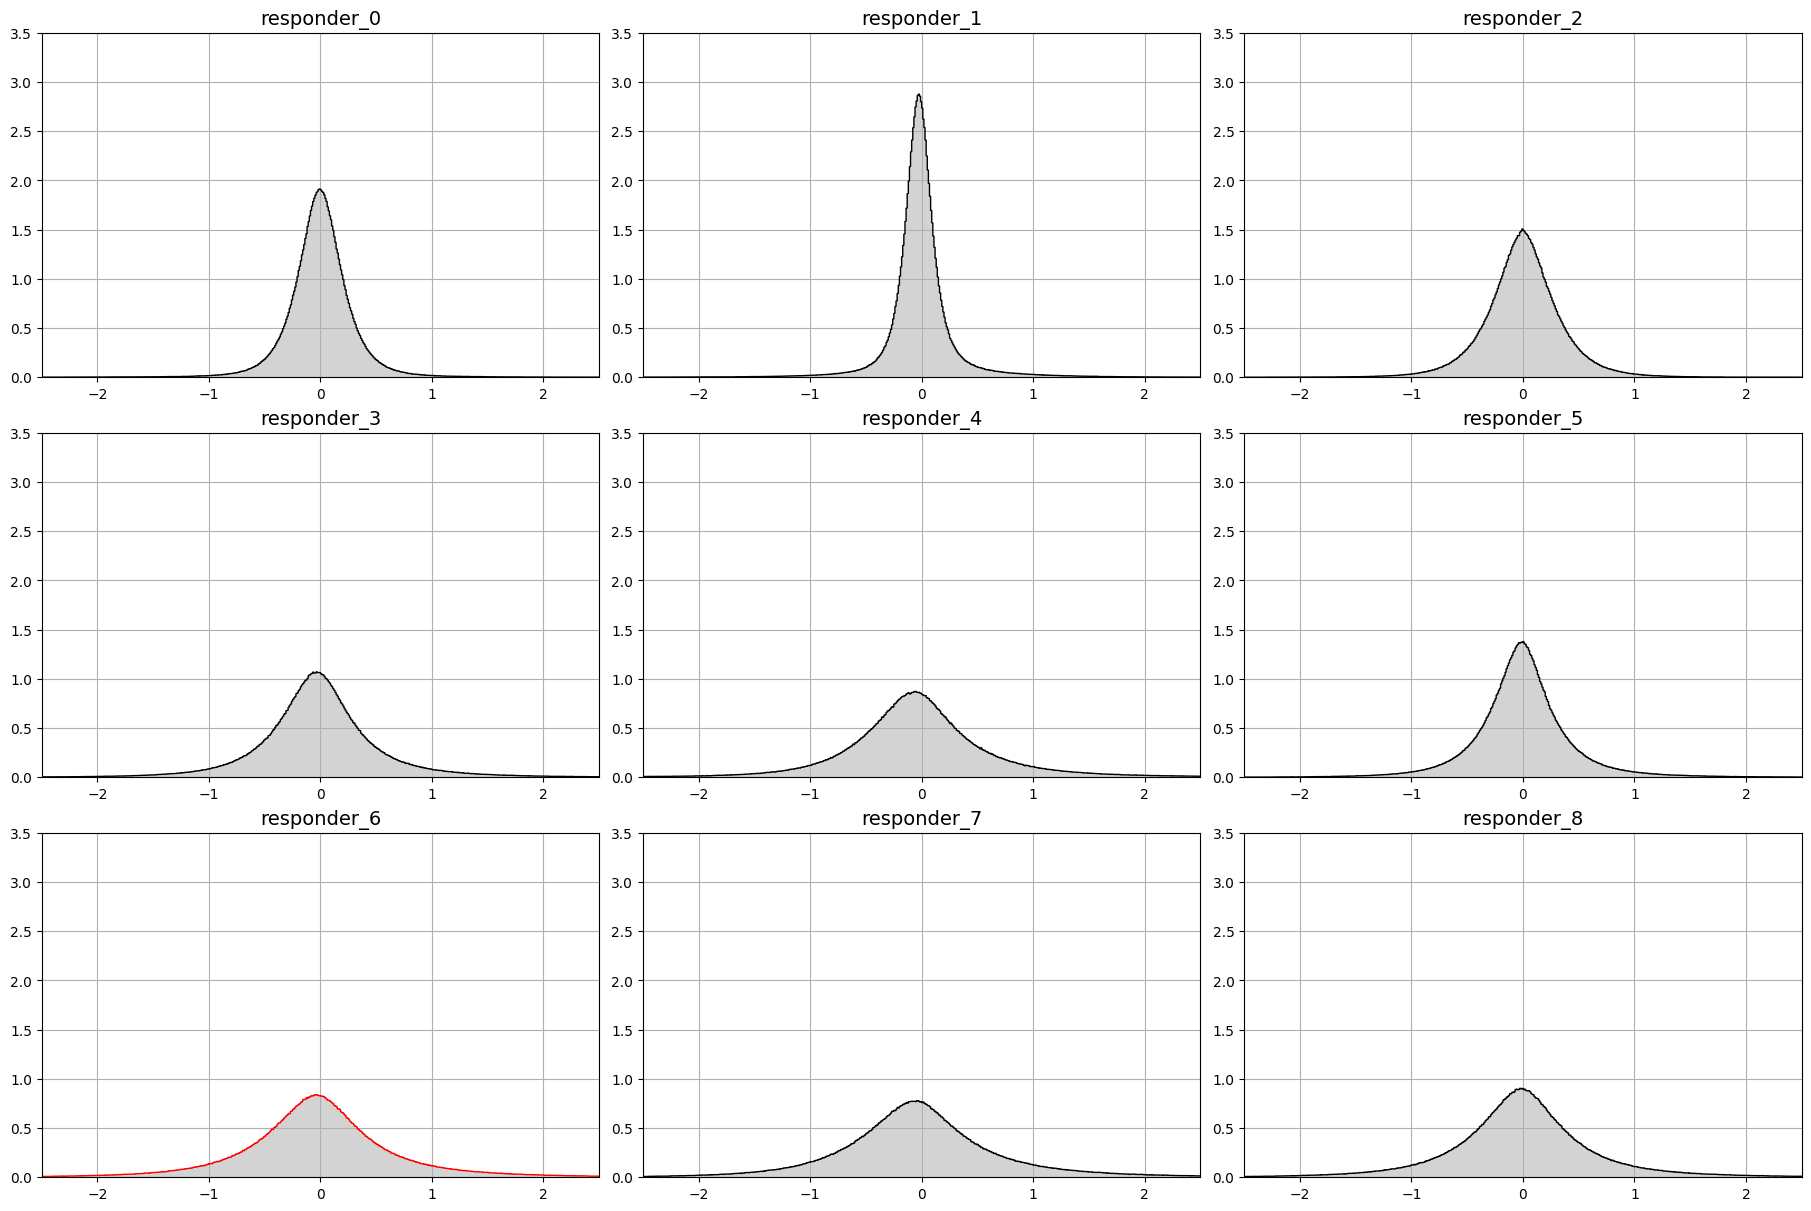

In [20]:
cols = 3
rows = 3

fig, axs = plt.subplots(rows, cols, figsize=(18, 4 * rows), constrained_layout=True)
axs = axs.flatten()

for j, ax in enumerate(axs):
    if j >= 9:
        ax.axis('off')  # отключаем пустые оси
        continue
    yy = train[f'responder_{j}']
    c = 'red' if j == 6 else 'black'
    b = 1000
    ax.hist(yy, bins=b, color=c, density=True, histtype="step")
    ax.hist(yy, bins=b, color='lightgrey', density=True)
    ax.set_ylim([0, 3.5])
    ax.set_xlim([-2.5, 2.5])
    ax.set_title(f"responder_{j}", fontsize=14)
    ax.grid(True)

plt.show()


Распределение для различных инструментов (symbol_id)

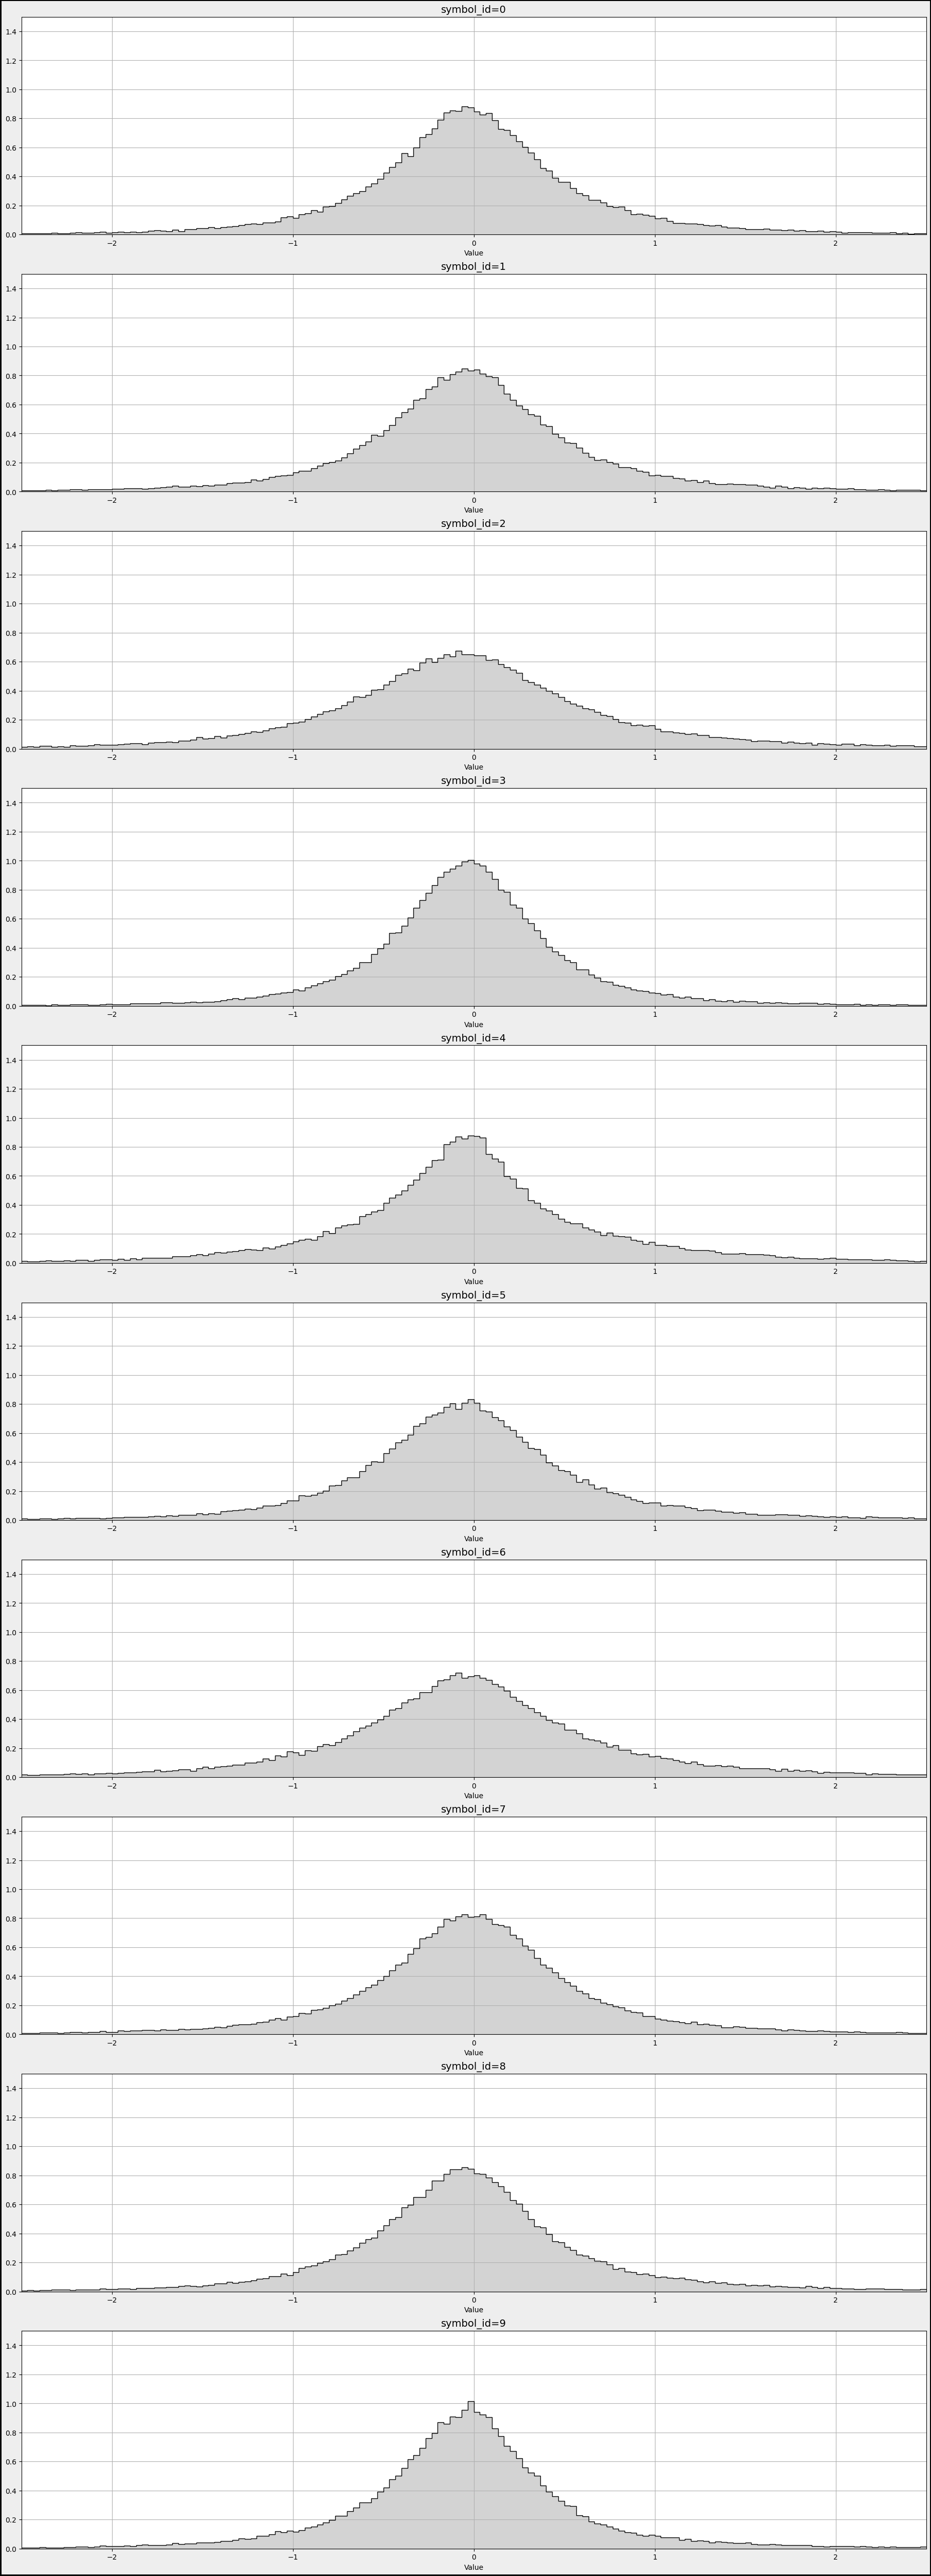

In [24]:
row = 10
b = 300
fig, axs = plt.subplots(row, 1, figsize=(18, 5 * row), constrained_layout=True)

for j in range(row):
    xx = train[train.symbol_id == j]['N']
    yy = train[train.symbol_id == j]['responder_6']
    c = 'black'
    
    ax = axs[j]
    ax.hist(yy, bins=b, color=c, density=True, histtype="step")
    ax.hist(yy, bins=b, color='lightgrey', density=True)
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([0, 1.5])
    ax.set_title(f"symbol_id={j}", fontsize=14)
    ax.grid(True)
    ax.set_xlabel('Value')

fig.patch.set_linewidth(3)
fig.patch.set_edgecolor('#000000')
fig.patch.set_facecolor('#eeeeee')
plt.show()


<Figure size 1000x600 with 0 Axes>

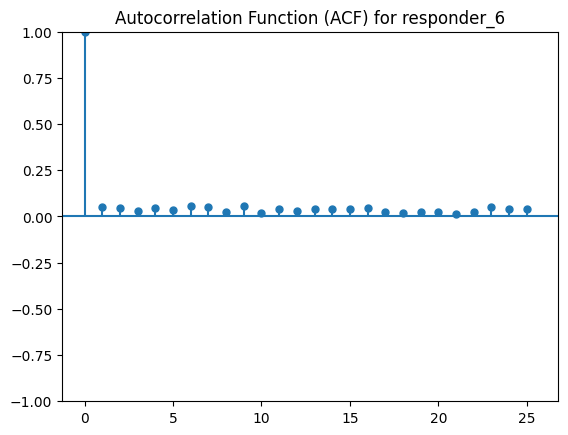

In [7]:
responder_6_series = train['responder_6']

plt.figure(figsize=(10, 6))
plot_acf(responder_6_series, lags=25)
plt.title('Autocorrelation Function (ACF) for responder_6')
plt.show()

# Fourier

In [7]:
signal = data["responder_6"].to_numpy()
N = len(signal)

Длина сигнала (N):
Количество точек в вашем временном ряду. Это определяет разрешение по частоте.

Шаг дискретизации (dt):
Если известен реальный временной шаг между точками (например, миллисекунды, секунды), его нужно указать. Если шаг неизвестен, можно считать его равным 1 (тогда частоты будут в условных единицах).

Ось времени (или индексы):
Если временные метки неравномерные, Фурье-анализ не применим напрямую. Для регулярных рядов используйте просто индексы.

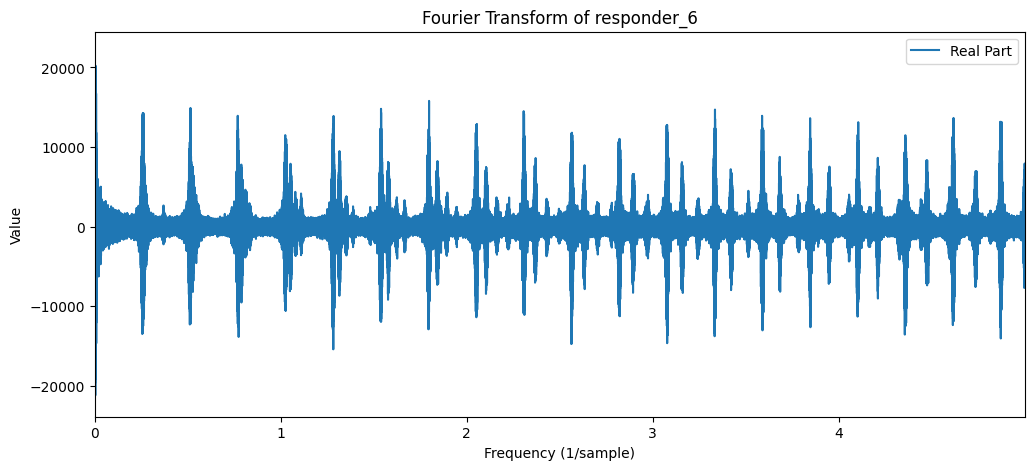

In [11]:
dt = 0.1  # секунда

# Фурье-преобразование
fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, d=dt)

# Оставляем только положительные частоты для наглядности
pos_mask = freqs >= 0
freqs_pos = freqs[pos_mask]
fft_real = fft_vals.real[pos_mask]
fft_abs = np.abs(fft_vals[pos_mask])

plt.figure(figsize=(12,5))
plt.plot(freqs_pos, fft_real, label='Real Part')
# plt.plot(freqs_pos, fft_abs, label='Amplitude Spectrum', alpha=0.7)
plt.title('Fourier Transform of responder_6')
plt.xlabel('Frequency (1/sample)')
plt.ylabel('Value')
plt.legend()
plt.xlim(0, freqs_pos.max())
plt.show()


Синяя реальная часть Фурье-образа сигнала. Она показывает, насколько сильно в сигнале выражены косинусные колебания на каждой частоте.

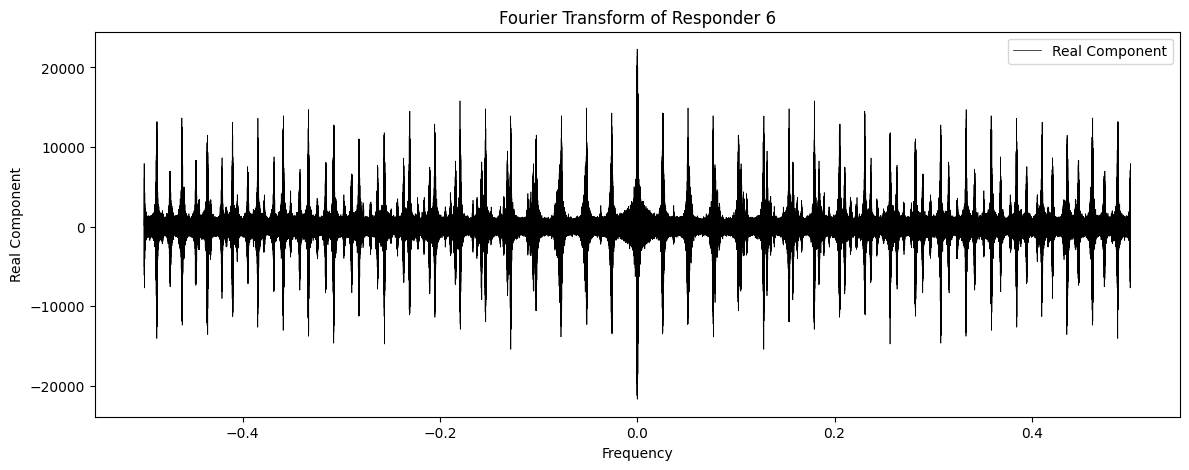

In [15]:
dt = 1 # если нет информации о реальном временном шаге

fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, d=dt)
fft_real = fft_vals.real

# Для наглядности используем только центральную часть спектра
sort_idx = np.argsort(freqs)
freqs_sorted = freqs[sort_idx]
fft_real_sorted = fft_real[sort_idx]

plt.figure(figsize=(14,5))
plt.plot(freqs_sorted, fft_real_sorted, color='k', linewidth=0.5, label='Real Component')

# Добавим аналитическую кривую
# Интервал 1/20 -> центральная ширина основного лепестка sinc-функции
x = freqs_sorted
# sinc_curve = np.sinc(28 * x) * max(fft_real_sorted)  # np.sinc(x) = sin(pi x)/(pi x)
# plt.plot(x, sinc_curve, color='r', linewidth=2, label=r'sin(20$\pi$x)/(20$\pi$x)')

plt.title('Fourier Transform of Responder 6')
plt.xlabel('Frequency')
plt.ylabel('Real Component')
plt.legend()
plt.show()